# Random Forest - Machine Learning Model

In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("tweetdata",encoding= 'unicode_escape')

In [3]:
df.shape

(10000, 5)

In [4]:
df.columns

Index(['Unnamed: 0', 'Data', 'Subjectivity', 'Polarity', 'Score'], dtype='object')

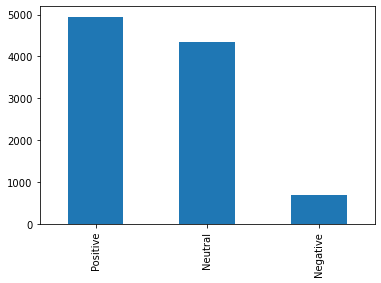

In [5]:
df.Score.value_counts().plot(kind='bar')

In [6]:
df.head()

,Unnamed: 0,Data,Subjectivity,Polarity,Score
0,0,cnsnews benshapiro Can COVID19Vaccine end the ...,0.0,0.0,Neutral
1,1,IntrepidWarrior realDonaldTrump Can COVID19Vac...,0.0,0.0,Neutral
2,2,edyong209 HelenBranswell Can COVID19Vaccine en...,0.0,0.0,Neutral
3,3,AdamTexDavis Can COVID19Vaccine end the pandemic,0.0,0.0,Neutral
4,4,HegKong Can COVID19Vaccine end the pandemic,0.0,0.0,Neutral


In [7]:
# negative, nautral, positive analysis
def getTextAnalysis(a):
    if a > 0:
        return "1"
    else:
        return "0"

In [8]:
df['Score'] = df['Polarity'].apply(getTextAnalysis)

In [9]:
df[df['Score'] == '0'].shape

(5054, 5)

In [10]:
df[df['Score'] == '1'].shape

(4946, 5)

In [11]:
df.head()

,Unnamed: 0,Data,Subjectivity,Polarity,Score
0,0,cnsnews benshapiro Can COVID19Vaccine end the ...,0.0,0.0,0
1,1,IntrepidWarrior realDonaldTrump Can COVID19Vac...,0.0,0.0,0
2,2,edyong209 HelenBranswell Can COVID19Vaccine en...,0.0,0.0,0
3,3,AdamTexDavis Can COVID19Vaccine end the pandemic,0.0,0.0,0
4,4,HegKong Can COVID19Vaccine end the pandemic,0.0,0.0,0


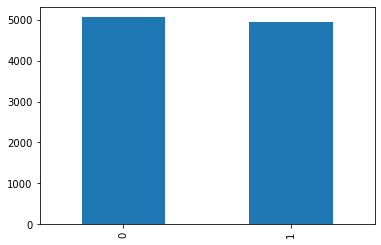

In [12]:
df.Score.value_counts().plot(kind='bar')

In [13]:
features = df.iloc[:, 1].values
target = df.iloc[:, 4].values

In [14]:
features

array(['cnsnews benshapiro Can COVID19Vaccine end the pandemic',
       'IntrepidWarrior realDonaldTrump Can COVID19Vaccine end the pandemic',
       'edyong209 HelenBranswell Can COVID19Vaccine end the pandemic',
       ...,
       'BREAKING Clinical trial for AstraZenecaOxford Covid19 vaccine has resumed in US company AstraZeneca COVID19 COVID19Vaccine',
       'Supply chain professionals point to the many current and potential challenges the nation faces related to COVID19',
       'RT AnitaOakville COVID19VaccineWe have added medicagoinc to s portfolio for up to 76M doses of their vaccine candidateWith th'],
      dtype=object)

In [15]:
target

array(['0', '0', '0', ..., '0', '1', '0'], dtype=object)

In [16]:
v_features = []

for text in range(0, len(features)):
    v_feature = re.sub(r'\W', ' ', str(features[text]))
    v_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', v_feature)
    v_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', v_feature) 
    v_feature = re.sub(r'\s+', ' ', v_feature, flags=re.I)
    v_feature = re.sub(r'^b\s+', '', v_feature)
    v_feature = v_feature.lower()
    v_features.append(v_feature)


In [17]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=3000, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
v_features = vectorizer.fit_transform(v_features).toarray()

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(v_features, target, test_size=0.4, random_state=42)

In [19]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [20]:
predictions = text_classifier.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[2030    0]
 [   5 1965]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2030
           1       1.00      1.00      1.00      1970

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

0.99875


In [22]:
from sklearn.model_selection import cross_val_score
rfc_cv_score = cross_val_score(text_classifier, v_features, target, cv=2, scoring='roc_auc')

In [23]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(rfc_cv_score)

[[2030    0]
 [   5 1965]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2030
           1       1.00      1.00      1.00      1970

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

[0.99985542 1.        ]
